<a href="https://colab.research.google.com/github/willian-gabriel-unicamp/F-229/blob/main/Experimento_de_Resfriamento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

#Instalar biblioteca lmfit
!pip install lmfit

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
#import lmfit

Mounted at /content/drive
     |████████████████████████████████| 266kB 8.3MB/s 
     |████████████████████████████████| 61kB 7.5MB/s 
     |████████████████████████████████| 256kB 12.7MB/s 
  Created wheel for lmfit: filename=lmfit-1.0.1-cp36-none-any.whl size=81989 sha256=eea508b89e5b27467d2de9440afb40abf7565ba158affe4721655dc8736f605c
  Stored in directory: /root/.cache/pip/wheels/ef/22/8d/6cd9c0af36f501cfb248673b05dad5d2c27504951d55519acb
  Created wheel for asteval: filename=asteval-0.9.21-cp36-none-any.whl size=17286 sha256=8ca17f9834e069908e9aced1bca09103a563ffd43797194caabf4a967e9ddd36
  Stored in directory: /root/.cache/pip/wheels/53/9d/3b/da1ff15feb7d97bb195837f4e78f971c748a945bd4720003ce
Successfully built lmfit asteval


# Importar data frames

In [ ]:
#garrafa térmica aberta
sheet_id_garrafa_aberta='1sN2kTrNoocruN402abYPbnojdXnaoUhNwtNgtOJrALY'

garrafa_aberta=pd.read_csv(f'https://docs.google.com/spreadsheets/d/{sheet_id_garrafa_aberta}/export?format=csv')

#calorímetro aberto
cal_aberto=pd.read_excel('/content/drive/MyDrive/F 229/Resfriamento/calorímetro aberto.xlsx')
t_cal_aberto=cal_aberto['tempo médio']
T_cal_aberto=cal_aberto['Kelvin']

#calorímetro fechado
cal_fechado=pd.read_excel('/content/drive/MyDrive/F 229/Resfriamento/calfechado.xlsx')
t_cal_fechado=cal_fechado['t(s)']
T_cal_fechado=cal_fechado['T(K)']


#Garrafa Térmica Fechada
garrafa_fechada=pd.read_excel('/content/drive/MyDrive/F 229/Resfriamento/Garrafa Térmica Fechada.xlsx')
t_garrafa_fechada=garrafa_fechada['tempo']
T_garrafa_fechada=garrafa_fechada['Temperatura']

#Garrafa de Vidro
garrafa_vidro=pd.read_excel('/content/drive/MyDrive/F 229/Resfriamento/Garrafa de vidro.xlsx')
t_vidro=garrafa_vidro['média']
T_vidro=garrafa_vidro['temperat']

garrafa_vidro

,temperat,média
0,340.15,26.0
1,339.15,67.5
2,338.15,97.5
3,337.15,130.0
4,336.15,164.0
5,335.15,189.0


# Gráficos dos Dados Experimentais preliminares

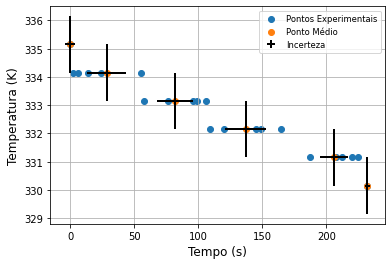

In [ ]:
plt.scatter(garrafa_aberta['Tempo (s)'],garrafa_aberta['Temperatura (K)'],label='Pontos Experimentais')
plt.scatter(garrafa_aberta['Tempo2 (s)'][0:6],garrafa_aberta['Temperatura2 (K)'][0:6],label='Ponto Médio')
plt.errorbar(garrafa_aberta['Tempo2 (s)'][0:6],garrafa_aberta['Temperatura2 (K)'][0:6],xerr=np.array([3.75277675,15.29978213,13.85640646,16.16580754,10.96965511,2.020725942]),yerr=1,fmt='none',label='Incerteza',ecolor='black',elinewidth=2)
plt.xlabel('Tempo (s)',fontsize=12)
plt.ylabel('Temperatura (K)',fontsize=12)
plt.grid()
plt.legend(fontsize='small')




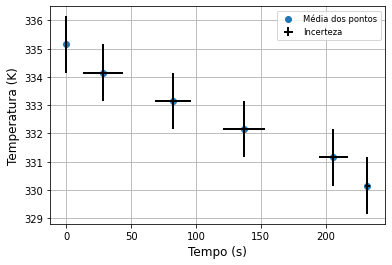

In [ ]:
fig,ax1=plt.subplots(1,1)

ax1.scatter(garrafa_aberta['Tempo2 (s)'][0:6],garrafa_aberta['Temperatura2 (K)'][0:6],label='Média dos pontos')
ax1.errorbar(garrafa_aberta['Tempo2 (s)'][0:6],garrafa_aberta['Temperatura2 (K)'][0:6],xerr=np.array([0.5773502692,15.29978213,13.85640646,16.16580754,10.96965511,2.020725942]),yerr=1,fmt='none',label='Incerteza',ecolor='black',elinewidth=2)

ax1.set_ylabel('Temperatura (K)',fontsize=12)
ax1.set_xlabel('Tempo (s)',fontsize=12)

ax1.legend(fontsize='small')
ax1.grid()

plt.show()

## Linearização através da primeira equação

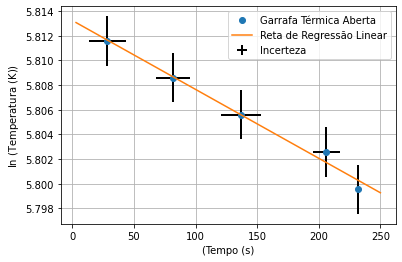

-5.5924648520271036e-05

In [ ]:
fig,ax1 = plt.subplots(1,1)

from scipy.stats import linregress

t=garrafa_aberta['Tempo2 (s)'][1:6]
T=garrafa_aberta['Temperatura2 (K)'][1:6]

t3= np.log(t)
T3 = np.log(T)
ax1.plot(t, T3,'o',label='Garrafa Térmica Aberta')
ax1.errorbar(t,T3,xerr=np.array([15.29978213,13.85640646,16.16580754,10.96965511,2.020725942]),yerr=0.002,fmt='none',label='Incerteza',ecolor='black',elinewidth=2)

a,b,_,_,_,= linregress(t,T3)
t_r = np.linspace(3,250)
ax1.plot(t_r,a*t_r+b, label='Reta de Regressão Linear')

plt.xlabel('(Tempo (s)')
plt.ylabel('$\ln$ (Temperatura (K))')
plt.legend()
ax1.grid()
# plt.savefig(pathfig+'fig_garrafa_termica_fechada.png')
plt.show()

a

# Teste da Equação 1 Linearizada

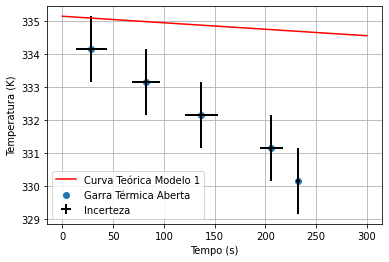

-5.5924648520271036e-05

In [ ]:
T_infinito=26.5+273.15
T_0=335.15
gamma=-a

fig,ax1 = plt.subplots(1,1)



t1=np.linspace(0,300)
T1= (T_0 - T_infinito)*np.exp(-gamma*t1) + T_infinito

ax1.scatter(t,T,label='Garra Térmica Aberta')
ax1.errorbar(t,T,xerr=np.array([15.29978213,13.85640646,16.16580754,10.96965511,2.020725942]),yerr=1,fmt='none',label='Incerteza',ecolor='black',elinewidth=2)
ax1.plot(t1,T1,'r',label='Curva Teórica Modelo 1')

plt.xlabel('Tempo (s)')
plt.ylabel('Temperatura (K)')
plt.legend()
plt.grid()

plt.show()

a

# Definição das variações de temperatura

In [ ]:
T_infinito=26.5+273.15

#garrafa térmica aberta
T_0=335.15
Delta_T3=1/(T-T_infinito)**(1/3)
Delta_T4=1/(T-T_infinito)**(1/4)
Delta_T6=1/(T-T_infinito)**(1/6)

#calorímetro aberto
T_0_cal_aberto=340.15
Delta_T3_cal_aberto=1/(T_cal_aberto - T_infinito)**(1/3)
Delta_T4_cal_aberto=1/(T_cal_aberto - T_infinito)**(1/4)
Delta_T6_cal_aberto=1/(T_cal_aberto - T_infinito)**(1/6)

#calorímetro fechado
T_0_cal_aberto=343
Delta_T3_cal_fechado=1/(T_cal_fechado - T_infinito)**(1/3)
Delta_T4_cal_fechado=1/(T_cal_fechado - T_infinito)**(1/4)
Delta_T6_cal_fechado=1/(T_cal_fechado - T_infinito)**(1/6)

#Garrafa Térmica Fechada
T_0_cal_aberto=341.15
Delta_T3_gar_fechada=1/(T_garrafa_fechada - T_infinito)**(1/3)
Delta_T4_gar_fechada=1/(T_garrafa_fechada - T_infinito)**(1/4)
Delta_T6_gar_fechada=1/(T_garrafa_fechada - T_infinito)**(1/6)

#Garrafa de Vidro
T_0_cal_aberto=340.15
Delta_T3_vidro=1/(T_vidro - T_infinito)**(1/3)
Delta_T4_vidro=1/(T_vidro - T_infinito)**(1/4)
Delta_T6_vidro=1/(T_vidro - T_infinito)**(1/6)



## Modelo de Equação 2

# n=1/3

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:67: MatplotlibDeprecationWarning: Unrecognized location 'upper rigth'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.


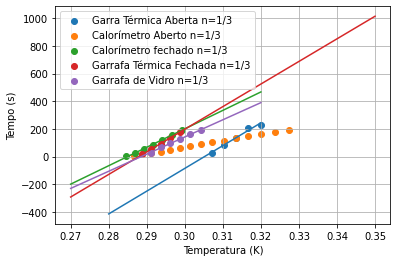

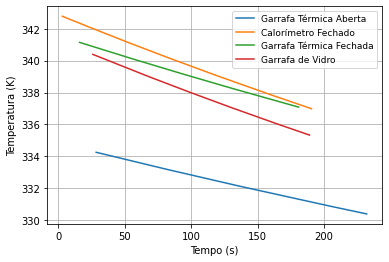

In [ ]:
fig,ax1 = plt.subplots(1,1)

#Garrafa Térmica Aberta
ax1.scatter(Delta_T3,t,label='Garra Térmica Aberta n=1/3')
a_3,b_3,_,_,_,= linregress(Delta_T3,t)
t_r = np.linspace(0.28,0.32)
ax1.plot(t_r,a_3*t_r+b_3)

#Calorímetro Aberto
ax1.scatter(Delta_T3_cal_aberto,t_cal_aberto,label='Calorímetro Aberto n=1/3')
a_3_cal_aberto,b_3_cal_aberto,_,_,_,= linregress(Delta_T3_cal_aberto,t_cal_aberto)
t_r = np.linspace(0.28,0.32)
ax1.plot(t_r,a_3_cal_aberto*t_r+b_3_cal_aberto)

#Calorímetro Fechado
ax1.scatter(Delta_T3_cal_fechado,t_cal_fechado,label='Calorímetro fechado n=1/3')
a_3_cal_fechado,b_3_cal_fechado,_,_,_,= linregress(Delta_T3_cal_fechado,t_cal_fechado)
t_r = np.linspace(0.27,0.32)
ax1.plot(t_r,a_3_cal_fechado*t_r+b_3_cal_fechado)

#Garrafa Térmica Fechada
ax1.scatter(Delta_T3_gar_fechada,t_garrafa_fechada,label='Garrafa Térmica Fechada n=1/3')
a_3_gar_fechada,b_3_gar_fechada,_,_,_,= linregress(Delta_T3_gar_fechada,t_garrafa_fechada)
t_r = np.linspace(0.27,0.35)
ax1.plot(t_r,a_3_gar_fechada*t_r+b_3_gar_fechada)

#Garrafa de Vidro
ax1.scatter(Delta_T3_vidro,t_vidro,label='Garrafa de Vidro n=1/3')
a_3_vidro,b_3_vidro,_,_,_,= linregress(Delta_T3_vidro,t_vidro)
t_r = np.linspace(0.27,0.32)
ax1.plot(t_r,a_3_vidro*t_r+b_3_vidro)

plt.ylabel('Tempo (s)')
plt.xlabel('Temperatura (K)')
plt.legend()
plt.grid()

fig,ax2 = plt.subplots(1,1)

#Garrafa Térmica Aberta
T_3=(a_3**3)/(-b_3+t)**3 +T_infinito
ax2.plot(t,T_3,label="Garrafa Térmica Aberta")
#ax2.scatter(t,T)

#Calorímetro Aberto
#T_3_cal_aberto=(a_3_cal_aberto**3)/(-b_3_cal_aberto+t_cal_aberto)**3 +T_infinito
#ax2.plot(t_cal_aberto,T_3_cal_aberto,label="Calorímetro Aberto")
#ax2.scatter(t_cal_aberto,T_cal_aberto)

#Calorímetro Fechado
T_3_cal_fechado=(a_3_cal_fechado**3)/(-b_3_cal_fechado+t_cal_fechado)**3 +T_infinito
ax2.plot(t_cal_fechado,T_3_cal_fechado,label="Calorímetro Fechado")
#ax2.scatter(t_cal_fechado,T_cal_fechado)

#Garrafa Térmica Fechada
T_3_gar_fechada=(a_3_gar_fechada**3)/(-b_3_gar_fechada+t_garrafa_fechada)**3 +T_infinito
ax2.plot(t_garrafa_fechada,T_3_gar_fechada,label="Garrafa Térmica Fechada")
#ax2.scatter(t_garrafa_fechada,T_garrafa_fechada)

#Garrafa de Vidro
T_3_vidro=(a_3_vidro**3)/(-b_3_vidro+t_vidro)**3 +T_infinito
ax2.plot(t_vidro,T_3_vidro,label="Garrafa de Vidro")
#ax2.scatter(t_vidro,T_vidro)

plt.xlabel('Tempo (s)')
plt.ylabel('Temperatura (K)')
plt.legend(fontsize=9, loc='upper rigth')
plt.grid()

plt.show()

In [ ]:
Delta_T3_cal_aberto

0    0.291193
1    0.293630
2    0.296151
3    0.298760
4    0.301464
5    0.304269
Name: temperat, dtype: float64

# n=1/4

16423.328925798905
-6743.385340579813


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:72: MatplotlibDeprecationWarning: Unrecognized location 'upper rigth'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.


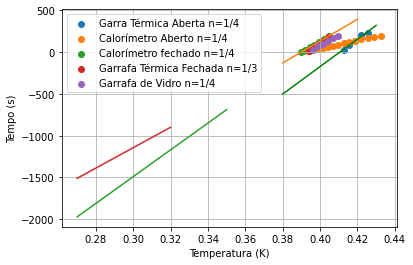

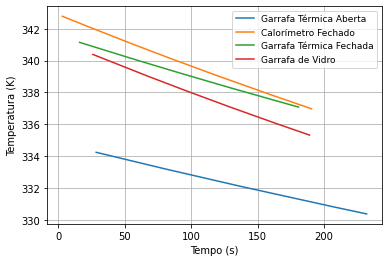

In [ ]:
fig,ax1 = plt.subplots(1,1)

#Garrafa Térmica Aberta
ax1.scatter(Delta_T4,t,label='Garra Térmica Aberta n=1/4')
a_4,b_4,_,_,_,= linregress(Delta_T4,t)
t_r = np.linspace(0.38,0.43)
ax1.plot(t_r,a_4*t_r+b_4,'g')

#Calorímetro Aberto
ax1.scatter(Delta_T4_cal_aberto,t_cal_aberto,label='Calorímetro Aberto n=1/4')
a_4_cal_aberto,b_4_cal_aberto,_,_,_,= linregress(Delta_T4_cal_aberto,t_cal_aberto)
t_r = np.linspace(0.38,0.43)
ax1.plot(t_r,a_4_cal_aberto*t_r+b_4_cal_aberto)

#Calorímetro Fechado
ax1.scatter(Delta_T4_cal_fechado,t_cal_fechado,label='Calorímetro fechado n=1/4')
a_4_cal_fechado,b_4_cal_fechado,_,_,_,= linregress(Delta_T4_cal_fechado,t_cal_fechado)
t_r = np.linspace(0.38,0.42)
ax1.plot(t_r,a_4_cal_fechado*t_r+b_4_cal_fechado)

#Garrafa Térmica Fechada
ax1.scatter(Delta_T4_gar_fechada,t_garrafa_fechada,label='Garrafa Térmica Fechada n=1/3')
a_4_gar_fechada,b_4_gar_fechada,_,_,_,= linregress(Delta_T4_gar_fechada,t_garrafa_fechada)
t_r = np.linspace(0.27,0.35)
ax1.plot(t_r,a_4_gar_fechada*t_r+b_4_gar_fechada)

#Garrafa de Vidro
ax1.scatter(Delta_T4_vidro,t_vidro,label='Garrafa de Vidro n=1/4')
a_4_vidro,b_4_vidro,_,_,_,= linregress(Delta_T4_vidro,t_vidro)
t_r = np.linspace(0.27,0.32)
ax1.plot(t_r,a_4_vidro*t_r+b_4_vidro)


plt.ylabel('Tempo (s)')
plt.xlabel('Temperatura (K)')
plt.legend()
plt.grid()

print(a_4)
print(b_4)

fig,ax2 = plt.subplots(1,1)

#Garrafa Térmica Aberta
T_4=(a_4**4)/(-b_4+t)**4 +T_infinito
ax2.plot(t,T_4,label="Garrafa Térmica Aberta")
#ax2.scatter(t,T)

#Calorímetro Aberto
#T_4_cal_aberto=(a_4_cal_aberto**4)/(-b_4_cal_aberto+t_cal_aberto)**4 +T_infinito
#ax2.plot(t_cal_aberto,T_4_cal_aberto,label="Calorímetro Aberto")
#ax2.scatter(t_cal_aberto,T_cal_aberto)

#Calorímetro Fechado
T_4_cal_fechado=(a_4_cal_fechado**4)/(-b_4_cal_fechado+t_cal_fechado)**4 +T_infinito
ax2.plot(t_cal_fechado,T_4_cal_fechado,label="Calorímetro Fechado")
#ax2.scatter(t_cal_fechado,T_cal_fechado)

#Garrafa Térmica Fechada
T_4_gar_fechada=(a_4_gar_fechada**4)/(-b_4_gar_fechada+t_garrafa_fechada)**4 +T_infinito
ax2.plot(t_garrafa_fechada,T_4_gar_fechada,label="Garrafa Térmica Fechada")
#ax2.scatter(t_garrafa_fechada,T_garrafa_fechada)

#Garrafa de Vidro
T_4_vidro=(a_4_vidro**4)/(-b_4_vidro+t_vidro)**4 +T_infinito
ax2.plot(t_vidro,T_4_vidro,label="Garrafa de Vidro")
#ax2.scatter(t_vidro,T_vidro)


plt.xlabel('Tempo (s)')
plt.ylabel('Temperatura (K)')
plt.legend(fontsize=9, loc='upper rigth')
plt.grid()

plt.show()

# n=1/6

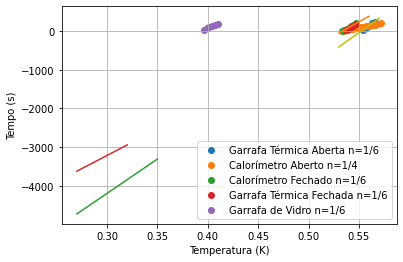

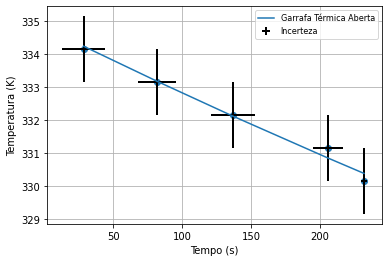

In [ ]:
fig,ax1 = plt.subplots(1,1)

#Garrafa Térmica Aberta
ax1.scatter(Delta_T6,t,label='Garrafa Térmica Aberta n=1/6')
a_6,b_6,_,_,_,= linregress(Delta_T6,t)
t_r = np.linspace(0.53,0.57)
ax1.plot(t_r,a_6*t_r+b_6,'y')

#Calorímetro Aberto
ax1.scatter(Delta_T6_cal_aberto,t_cal_aberto,label='Calorímetro Aberto n=1/4')
a_6_cal_aberto,b_6_cal_aberto,_,_,_,= linregress(Delta_T6_cal_aberto,t_cal_aberto)
t_r = np.linspace(0.53,0.56)
ax1.plot(t_r,a_6_cal_aberto*t_r+b_6_cal_aberto)

#Calorímetro Fechado
ax1.scatter(Delta_T6_cal_fechado,t_cal_fechado,label='Calorímetro Fechado n=1/6')
a_6_cal_fechado,b_6_cal_fechado,_,_,_,= linregress(Delta_T6_cal_fechado,t_cal_fechado)
t_r = np.linspace(0.53,0.56)
ax1.plot(t_r,a_6_cal_fechado*t_r+b_6_cal_fechado)

#Garrafa Térmica Fechada
ax1.scatter(Delta_T6_gar_fechada,t_garrafa_fechada,label='Garrafa Térmica Fechada n=1/6')
a_6_gar_fechada,b_6_gar_fechada,_,_,_,= linregress(Delta_T6_gar_fechada,t_garrafa_fechada)
t_r = np.linspace(0.27,0.35)
ax1.plot(t_r,a_6_gar_fechada*t_r+b_6_gar_fechada)

#Garrafa de Vidro
ax1.scatter(Delta_T4_vidro,t_vidro,label='Garrafa de Vidro n=1/6')
a_6_vidro,b_6_vidro,_,_,_,= linregress(Delta_T6_vidro,t_vidro)
t_r = np.linspace(0.27,0.32)
ax1.plot(t_r,a_6_vidro*t_r+b_6_vidro)

plt.ylabel('Tempo (s)')
plt.xlabel('Temperatura (K)')
plt.legend()
plt.grid()

fig,ax2 = plt.subplots(1,1)

#Garrafa Térmica Aberta
T_6=(a_6**6)/(-b_6+t)**6 +T_infinito
ax2.plot(t,T_6,label="Garrafa Térmica Aberta")
ax2.scatter(t,T)
plt.errorbar(garrafa_aberta['Tempo2 (s)'][1:6],garrafa_aberta['Temperatura2 (K)'][1:6],xerr=np.array([15.29978213,13.85640646,16.16580754,10.96965511,2.020725942]),yerr=1,fmt='none',label='Incerteza',ecolor='black',elinewidth=2)

#Calorímetro Aberto
#T_6_cal_aberto=(a_6_cal_aberto**6)/(-b_6_cal_aberto+t_cal_aberto)**6 +T_infinito
#ax2.plot(t_cal_aberto,T_6_cal_aberto,label="Calorímetro Aberto")
#ax2.scatter(t_cal_aberto,T_cal_aberto)

#Calorímetro Fechado
#T_6_cal_fechado=(a_6_cal_fechado**6)/(-b_6_cal_fechado+t_cal_fechado)**6 +T_infinito
#ax2.plot(t_cal_fechado,T_6_cal_fechado,label="Calorímetro Fechado")
#ax2.scatter(t_cal_fechado,T_cal_fechado)

#Garrafa Térmica Fechada
#T_6_gar_fechada=(a_6_gar_fechada**6)/(-b_6_gar_fechada+t_garrafa_fechada)**6 +T_infinito
#ax2.plot(t_garrafa_fechada,T_6_gar_fechada,label="Garrafa Térmica Fechada")
#ax2.scatter(t_garrafa_fechada,T_garrafa_fechada)

#Garrafa de Vidro
#T_6_vidro=(a_6_vidro**6)/(-b_6_vidro+t_vidro)**6 +T_infinito
#ax2.plot(t_vidro,T_6_vidro,label="Garrafa de Vidro")
#ax2.scatter(t_vidro,T_vidro)


plt.xlabel('Tempo (s)')
plt.ylabel('Temperatura (K)')
plt.legend(fontsize=8, loc='upper right')
plt.grid()
#plt.xticks(range(0,250,20))
#plt.yticks(np.arange(330,343,0.9))

plt.show()

In [ ]:
#garrafa térmica aberta
print(a_6)
print(b_6)


18437.532461788116
-10185.814420614839


In [ ]:
#calorímetro Fechado
print(a_6_cal_fechado)
print(b_6_cal_fechado)

14401.776435764445
-7687.563357939937


In [ ]:
#Garrafa Térmica Fechada
print(a_6_gar_fechada)
print(b_6_gar_fechada)

17704.86056564373
-9499.54868194696


In [ ]:
#Garrafa de Vidro
print(a_6_vidro)
print(b_6_vidro)

13537.695146423917
-7272.36758391926
